In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.integrate as si
import numpy as np
from scipy.signal import find_peaks
import time
from datetime import datetime
from matplotlib import collections as matcoll
from pylab import rcParams

In [2]:
sns.set()
rcParams['figure.figsize'] = 10, 5

In [3]:
def data_frame(event):
    return pd.read_csv(event)

In [4]:
event4 = data_frame('C:\\Users\\krsai\\OneDrive\\Desktop\\Honk data\\drive-download-20200328T072000Z-001\\TEST2\\TEST2\\REALME\\BIKE 28Dec,2019-11-09-44 AM\\Testing Data\\All_Details2.csv')
event4.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,0.110,3.435,9.264,23.555063,87.29839,0.0,69.713882,19255,11:09:46 AM,1577511586053
1,0.087,3.503,9.229,23.555063,87.29839,0.0,69.713882,19255,11:09:46 AM,1577511586054
2,0.090,3.450,9.243,23.555063,87.29839,0.0,69.713882,19255,11:09:46 AM,1577511586065
3,0.039,3.492,9.257,23.555063,87.29839,0.0,69.713882,19255,11:09:46 AM,1577511586066
4,0.072,3.448,9.326,23.555063,87.29839,0.0,69.713882,19255,11:09:46 AM,1577511586067


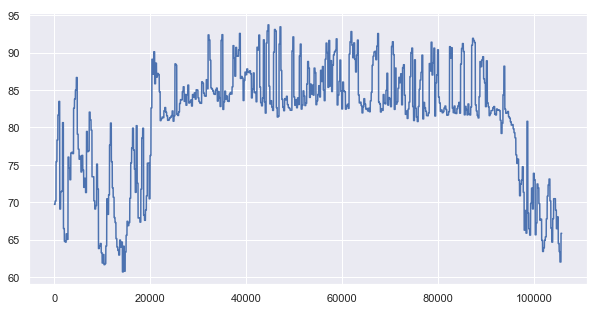

In [5]:
plt.plot(event4.sound)

In [6]:
def time(event):
    date_time = []
    for index in event.index:
        p = pd.Timestamp(event.timestamp.loc[index],unit='ms',tz='Asia/Kolkata')
        date_time.append(p.time())
        
    time = []
    for i in range(len(date_time)):
        a = ((date_time[i].hour*3600 + date_time[i].minute*60 + date_time[i].second) + date_time[i].microsecond*10**(-6))
        time.append(a)
        
    ar = np.array(time)
    event['time'] = ar
        
    return event

In [7]:
event4 = time(event4)
event4.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,0.110,3.435,9.264,23.555063,87.29839,0.0,69.713882,19255,40186.053,1577511586053
1,0.087,3.503,9.229,23.555063,87.29839,0.0,69.713882,19255,40186.054,1577511586054
2,0.090,3.450,9.243,23.555063,87.29839,0.0,69.713882,19255,40186.065,1577511586065
3,0.039,3.492,9.257,23.555063,87.29839,0.0,69.713882,19255,40186.066,1577511586066
4,0.072,3.448,9.326,23.555063,87.29839,0.0,69.713882,19255,40186.067,1577511586067


In [8]:
event4.time[len(event4)-1]-event4.time[0]

264.247000000003

## distance

In [9]:
def distance(event,a1,a2):
    R = 6371
    lat1 = math.radians(event.latitude[a1])
    lon1 = math.radians(event.longitude[a1])

    lat2 = math.radians(event.latitude[a2])
    lon2= math.radians(event.longitude[a2])

    d_lat = lat2 - lat1
    d_lon = lon2 - lon1

    t_s1 = event.time[a1]
    t_s2 = event.time[a2]
    d_t_s = (t_s2-t_s1)
    
    a = math.sin(d_lat / 2.0) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(d_lon / 2.0) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    dis = c * R
    
    return dis,d_t_s

## velocity

In [10]:
total_dis,total_time = distance(event4,0,len(event4)-1)
total_vel = total_dis/(total_time/3600)
total_time,total_dis,total_vel

(264.247000000003, 1.7839697987955117, 24.30412180900358)

## window

In [11]:
def window(x,event):
    last_check = 0
    window = []

    nums = []
    for i in range(1,100):
        nums.append(i*x)

    for index in nums:
        window.append(event.loc[last_check:index-1])
        last_check = index
    return window

## honk count

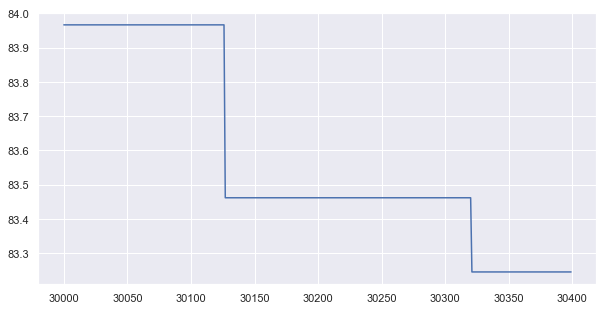

In [12]:
plt.plot(event4.sound[30000:30400])

In [13]:
event4.time[30320]-event4.time[30125]

0.4850000000005821

In [14]:
def honk_indexing(event,n):
    initial_p=[]
    end_p=[]
    total_honk=0
    for i,j in zip(window(n,event)[0:100], range(len(window(n,event)[0:100]))):
        c=0
        ma = np.amax(i.sound)
        if(ma>90):
            for k in i.sound:
                if(k == ma):
                    c += 1
            initial_p.append(np.argmax(i.sound))
            end_p.append(np.argmax(i.sound)+c)  
    
        if(ma>90):
            total_honk += 1
    return initial_p,end_p,total_honk;

In [15]:
initial_p,end_p,total_honk = honk_indexing(event4,1000)
# initial_p,end_p,total_honk

C:\Users\krsai\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [16]:
def honk_dur_dis_vel(event):
    dis=[]
    dur=[]
    vel=[]
    for i,j in zip(initial_p,end_p):
        d,t=distance(event,i,j)
        dis.append(d)
        dur.append(t)
        v = d/(t/3600)
        vel.append(v)
    return dis,dur,vel

In [17]:
honk_dis,honk_dur,honk_vel = honk_dur_dis_vel(event4)
# honk_dis,honk_dur,honk_vel

## actual velocity plot (calculated by phone)

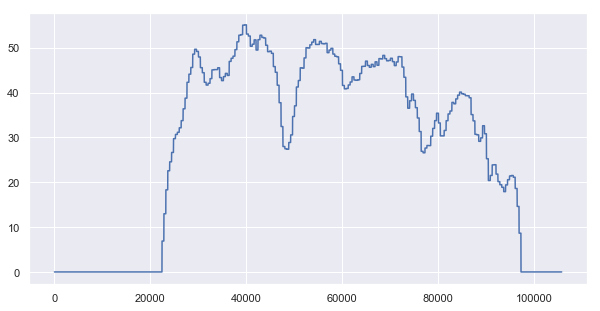

In [18]:
plt.plot(event4.speed)

## velocity when honk detected plot

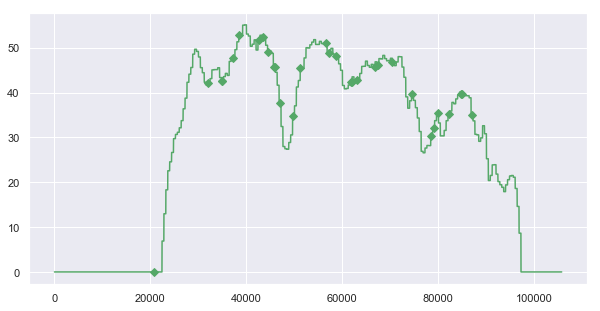

In [19]:
plt.plot(event4.speed, '-gD', markevery=initial_p)

## distance curve

In [20]:
# distance of each point from initial point
whole_dis = []
d=0
for j in range(0,len(event4)):
    x,t = distance(event4,0,j)
    whole_dis.append(x)
# whole_dis

In [21]:
s=0
for i in whole_dis:
    s += i
# s

In [22]:
honk_binary = []
for i in event4.sound:
    if(i>90):
        honk_binary.append(1)
    else:
        honk_binary.append(0)
# honk_binary

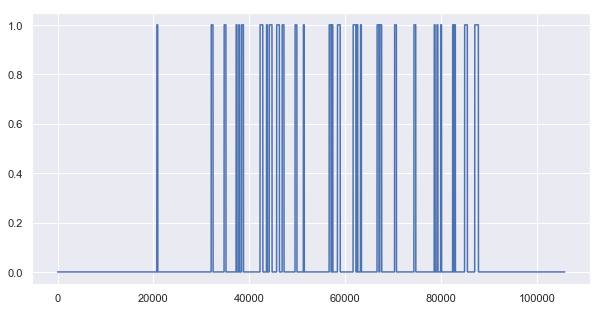

In [23]:
plt.plot(honk_binary)

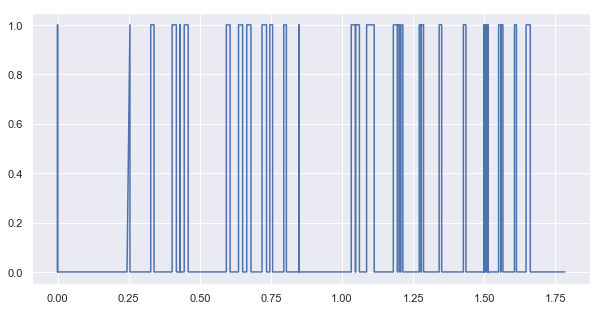

In [24]:
# plot of honk with actual distance of each point
plt.plot(whole_dis,honk_binary)

## effective region of self honking

In [30]:
# self honk data while scooty is stationary

event1 = data_frame('C:\\Users\\krsai\\OneDrive\\Desktop\\honk_eff_region\\POCKET_Redmi Note 5\\Stationary (self)\\SCOOTY 17May,2020-06-00-31 PM\\Testing Data\\Stationary_self.csv')
event1.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,0.220212,0.484498,9.705690,25.979064,85.673432,0,17.844148,1249.280029,18:00:34 PM,1.589720e+12
1,0.189307,0.458372,9.700708,25.979064,85.673432,0,17.844148,1249.280029,18:00:34 PM,1.589720e+12
2,0.189307,0.458372,9.700708,25.979064,85.673432,0,17.844148,1249.280029,18:00:34 PM,1.589720e+12
3,0.180853,0.437392,9.725188,25.979064,85.673432,0,17.844148,1249.280029,18:00:34 PM,1.589720e+12
4,0.190164,0.450234,9.769152,25.979064,85.673432,0,17.844148,1249.280029,18:00:34 PM,1.589720e+12


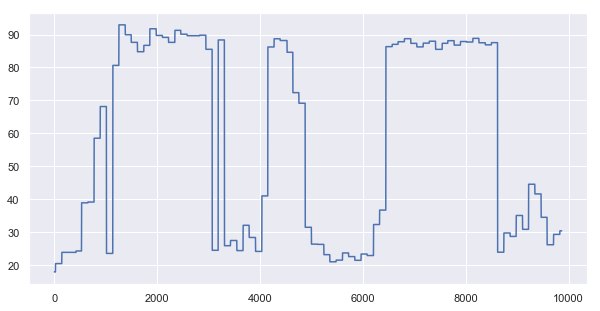

In [31]:
plt.plot(event1.sound)

In [52]:
# self honk data while scooty is in motion

event2 = data_frame('C:\\Users\\krsai\\OneDrive\\Desktop\\honk_eff_region\\POCKET_Redmi Note 5\\Motion (self)\\SCOOTY 17May,2020-06-04-46 PM\\Testing Data\\Motion_self.csv')
event2.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,-1.624666,-1.049287,9.114760,25.978942,85.672829,0.0,38.651632,492.160004,18:04:49 PM,1.589720e+12
1,-1.631798,-1.022165,9.229902,25.978942,85.672829,0.0,38.651632,492.160004,18:04:49 PM,1.589720e+12
2,-1.574138,-0.938163,9.416063,25.978942,85.672829,0.0,38.651632,492.160004,18:04:49 PM,1.589720e+12
3,-1.531023,-0.866467,9.505907,25.978942,85.672829,0.0,38.651632,492.160004,18:04:49 PM,1.589720e+12
4,-1.529592,-0.852930,9.546858,25.978942,85.672829,0.0,38.651632,492.160004,18:04:49 PM,1.589720e+12


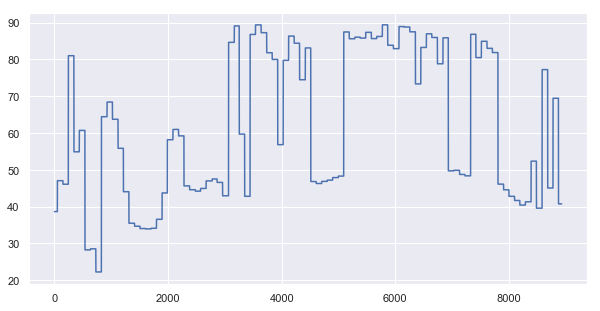

In [53]:
plt.plot(event2.sound)

In [62]:
# another (scooty) honk data while bike is stationary (aprox 5m distant)

event3_5 = data_frame('C:\\Users\\krsai\\OneDrive\\Desktop\\honk_eff_region\\POCKET_Redmi Note 5\\Stationary(5-1)_another\\SCOOTY 17May,2020-06-09-55 PM\\Testing Data\\Stationary_another_5.csv')
event3_5.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,-0.225623,0.180584,9.618920,25.979051,85.673442,0,25.005783,743.039978,18:09:58 PM,1.589720e+12
1,-0.213301,0.220986,9.591110,25.979051,85.673442,0,25.005783,743.039978,18:09:58 PM,1.589720e+12
2,-0.209832,0.203809,9.607069,25.979051,85.673442,0,25.005783,743.039978,18:09:58 PM,1.589720e+12
3,-0.216650,0.238345,9.629903,25.979051,85.673442,0,25.005783,743.039978,18:09:58 PM,1.589720e+12
4,-0.238169,0.203782,9.668489,25.979051,85.673442,0,25.005783,743.039978,18:09:58 PM,1.589720e+12


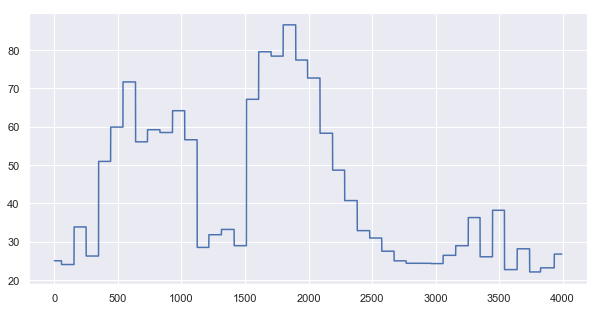

In [63]:
plt.plot(event3_5.sound)

In [64]:
# another (scooty) honk data while bike is stationary (aprox 4m distant)

event3_4 = data_frame('C:\\Users\krsai\\OneDrive\\Desktop\\honk_eff_region\\POCKET_Redmi Note 5\\Stationary(5-1)_another\\SCOOTY 17May,2020-06-11-06 PM\\Testing Data\\Stationary_another_4.csv')
event3_4.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,3.325007,1.446778,9.069038,25.979045,85.673456,0,57.929186,325.76001,18:11:09 PM,1.589720e+12
1,3.393172,1.777536,8.834287,25.979045,85.673456,0,57.929186,325.76001,18:11:09 PM,1.589720e+12
2,3.433898,2.085053,8.633428,25.979045,85.673456,0,57.929186,325.76001,18:11:09 PM,1.589720e+12
3,3.230561,2.345656,8.428354,25.979045,85.673456,0,57.929186,325.76001,18:11:09 PM,1.589720e+12
4,2.833426,2.727265,8.092274,25.979045,85.673456,0,57.929186,325.76001,18:11:09 PM,1.589720e+12


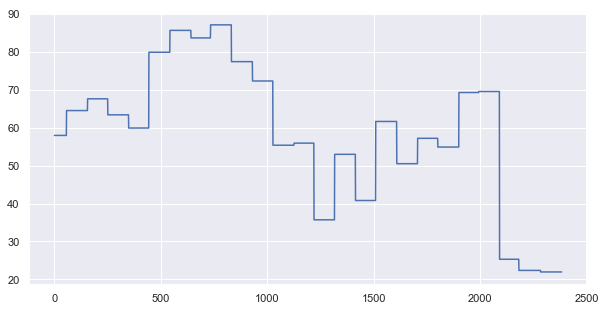

In [65]:
plt.plot(event3_4.sound)

In [66]:
# another (scooty) honk data while bike is stationary (aprox 3m distant)

event3_3 = data_frame('C:\\Users\\krsai\\OneDrive\\Desktop\\honk_eff_region\\POCKET_Redmi Note 5\\Stationary(5-1)_another\\SCOOTY 17May,2020-06-12-43 PM\\Testing Data\\Stationary_another_3.csv')
event3_3.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,1.088796,-0.028917,9.712734,25.979056,85.67345,0,47.162624,174.720001,18:12:46 PM,1.589720e+12
1,1.304174,-0.476087,9.506134,25.979056,85.67345,0,47.162624,174.720001,18:12:46 PM,1.589720e+12
2,1.515543,-0.840743,9.424283,25.979056,85.67345,0,47.162624,174.720001,18:12:46 PM,1.589720e+12
3,1.524567,-0.804903,9.498361,25.979056,85.67345,0,47.162624,174.720001,18:12:46 PM,1.589720e+12
4,1.624293,-0.558841,9.652343,25.979056,85.67345,0,47.162624,174.720001,18:12:46 PM,1.589720e+12


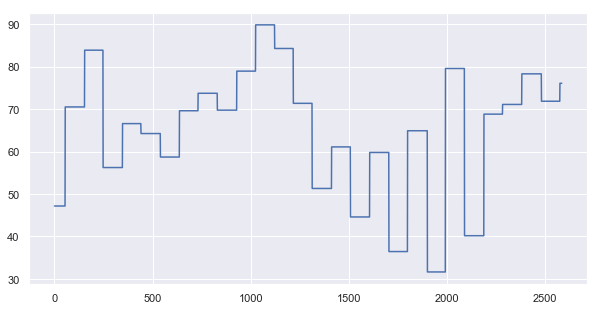

In [67]:
plt.plot(event3_3.sound)

In [68]:
# another (scooty) honk data while bike is stationary (aprox 2m distant)

event3_2 = data_frame('C:\\Users\\krsai\\OneDrive\\Desktop\\honk_eff_region\\POCKET_Redmi Note 5\\Stationary(5-1)_another\\SCOOTY 17May,2020-06-13-54 PM\\Testing Data\\Stationary_another_2.csv')
event3_2.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,1.294340,4.081959,7.765811,25.979045,85.673428,0,50.158727,491.519989,18:13:57 PM,1.589720e+12
1,1.603941,4.028460,7.765131,25.979045,85.673428,0,50.158727,491.519989,18:13:57 PM,1.589720e+12
2,1.956586,3.994343,7.784844,25.979045,85.673428,0,50.158727,491.519989,18:13:57 PM,1.589720e+12
3,2.387366,3.964097,7.678040,25.979045,85.673428,0,50.158727,491.519989,18:13:57 PM,1.589720e+12
4,2.914672,3.970969,6.951857,25.979045,85.673428,0,50.158727,491.519989,18:13:57 PM,1.589720e+12


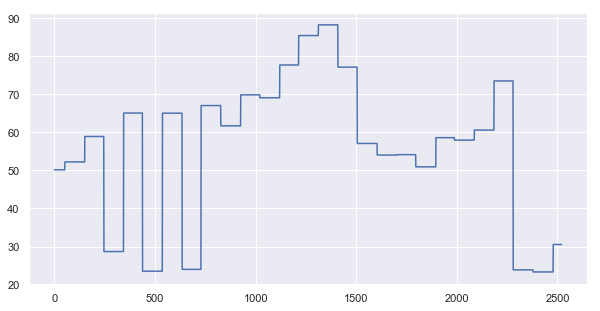

In [70]:
plt.plot(event3_2.sound)

In [71]:
# another (scooty) honk data while bike is stationary (aprox 1m distant)

event3_1 = data_frame('C:\\Users\\krsai\\OneDrive\\Desktop\\honk_eff_region\\POCKET_Redmi Note 5\\Stationary(5-1)_another\\SCOOTY 17May,2020-06-15-31 PM\\Testing Data\\Stationary_another_1.csv')
event3_1.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,1.998516,0.458803,9.422742,25.97905,85.67345,0,53.176258,337.920013,18:15:34 PM,1.589720e+12
1,2.021562,0.412554,9.421704,25.97905,85.67345,0,53.176258,337.920013,18:15:34 PM,1.589720e+12
2,2.017973,0.280534,9.449012,25.97905,85.67345,0,53.176258,337.920013,18:15:34 PM,1.589720e+12
3,2.004025,0.121171,9.503396,25.97905,85.67345,0,53.176258,337.920013,18:15:34 PM,1.589720e+12
4,2.014812,-0.109719,9.561518,25.97905,85.67345,0,53.176258,337.920013,18:15:35 PM,1.589720e+12


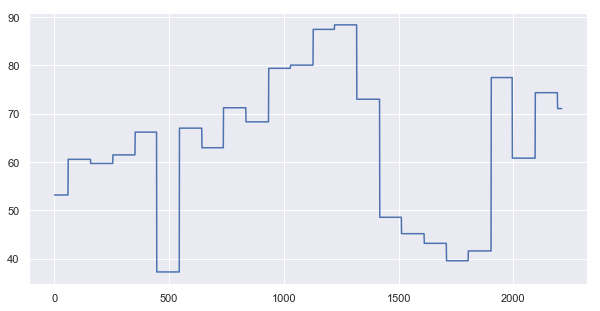

In [72]:
plt.plot(event3_1.sound)